In [70]:
import pandas as pd
import pandas as pd
import numpy as np
import pandas_gbq 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns 
from google.cloud import bigquery
from pandas_gbq import to_gbq
from google.cloud.bigquery import Client, QueryJobConfig
import warnings
warnings.filterwarnings('ignore')


In [71]:
project_id = "model-lookups-mysql"
client = bigquery.Client(project=project_id)
query="""SELECT * FROM `model-lookups-mysql.leads_dmp.lewis_mlm_live`WHERE Lead_Status IN ('OTB', 'Decline')and deceased = 0 and dma_sensitive = 0 and bf_sensitive = 0 and credit_score > 300"""
job=client.query(query)
data=job.to_dataframe()

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241737 entries, 0 to 241736
Data columns (total 59 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   consumer_id                           241737 non-null  Int64 
 1   idno                                  241737 non-null  object
 2   gender_male                           241737 non-null  Int64 
 3   gender_female                         241737 non-null  Int64 
 4   gender                                241737 non-null  object
 5   age                                   241737 non-null  Int64 
 6   race_w                                241737 non-null  Int64 
 7   race_b                                241737 non-null  Int64 
 8   race_i                                241737 non-null  Int64 
 9   race_c                                241737 non-null  Int64 
 10  race_u                                241737 non-null  Int64 
 11  race         

In [73]:
data.isnull().sum()

consumer_id                             0
idno                                    0
gender_male                             0
gender_female                           0
gender                                  0
age                                     0
race_w                                  0
race_b                                  0
race_i                                  0
race_c                                  0
race_u                                  0
race                                    0
suburb_lookup_id                        0
have_celltelno                          0
have_email                              0
have_hometelno                          0
have_worktelno                          0
is_home_owners                          0
is_car_owners                           0
is_employed                             0
is_govt_employed                        0
is_director                             0
is_under_debtreview                     0
is_married                        

In [74]:
sc=['calculated_gender', 'calculated_age','Lead_Income', 'Lead_OTB_Value','have_personal_loan' ,
'Lead_Chain', 'is_govt_employed', 'is_employed', 'Lead_Status',
'credit_score', 'is_home_owners', 'is_car_owners' , 'is_under_debtreview','interest_retail_furniture',
'interest_retail_furniture_buy_cash', 'interest_retail_furniture_buy_credit']
data=data[sc]

In [75]:
change=['Lead_Income', 'Lead_OTB_Value']


In [76]:
for change in data[change]:
    non_numeric = data[~data[change].apply(lambda x: isinstance(x, (int, float)) or x.replace('.', '', 1).isdigit())]
    data = data[data[change].apply(lambda x: x.replace('.', '', 1).isdigit())]
    data[change]=data[change].astype('float')


In [77]:
data

,calculated_gender,calculated_age,Lead_Income,Lead_OTB_Value,have_personal_loan,Lead_Chain,is_govt_employed,is_employed,Lead_Status,credit_score,is_home_owners,is_car_owners,is_under_debtreview,interest_retail_furniture,interest_retail_furniture_buy_cash,interest_retail_furniture_buy_credit
0,M,29,14600.0,20000.0,1,BHE,0,1,OTB,625,0,0,0,0,0,0
1,M,34,12500.0,0.0,1,LS,0,0,Decline,600,1,0,1,0,0,0
2,F,34,51.0,5300.0,1,LS,0,0,OTB,616,0,0,0,1,0,1
3,F,35,3000.0,0.0,1,LS,0,0,OTB,665,0,1,0,0,0,0
4,F,36,1500.0,3800.0,0,BHE,0,0,OTB,636,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241732,M,42,9000.0,18000.0,1,LS,0,1,OTB,615,1,1,0,0,0,0
241733,M,44,1500.0,6000.0,1,LS,0,0,OTB,544,1,0,0,1,0,1
241734,F,48,3500.0,0.0,1,BRS,0,1,Decline,620,0,0,0,0,0,0
241735,F,48,4000.0,0.0,0,BRS,0,0,Decline,590,0,0,0,1,0,1


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241469 entries, 0 to 241736
Data columns (total 16 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   calculated_gender                     241469 non-null  object 
 1   calculated_age                        241469 non-null  Int64  
 2   Lead_Income                           241469 non-null  float64
 3   Lead_OTB_Value                        241469 non-null  float64
 4   have_personal_loan                    241469 non-null  Int64  
 5   Lead_Chain                            241469 non-null  object 
 6   is_govt_employed                      241469 non-null  Int64  
 7   is_employed                           241469 non-null  Int64  
 8   Lead_Status                           241469 non-null  object 
 9   credit_score                          241469 non-null  Int64  
 10  is_home_owners                        241469 non-null  Int64  
 11  is_ca

In [79]:
cat_col_no_object=['is_govt_employed', 'is_employed', 
'is_home_owners', 'is_car_owners' , 'is_under_debtreview','interest_retail_furniture','have_personal_loan',
'interest_retail_furniture_buy_cash', 'interest_retail_furniture_buy_credit']
data[cat_col_no_object]= data[cat_col_no_object].astype(str)
others=[  'is_govt_employed', 'is_home_owners', 'is_car_owners' , 'is_under_debtreview','have_personal_loan',
        'interest_retail_furniture','interest_retail_furniture_buy_cash', 'interest_retail_furniture_buy_credit']
recoding_others={'0': 'No', '1':'Yes'}
data[others]=data[others].replace(recoding_others)
recoding_employed={'0': 'Unknown/Unemployed', '1':'Employed'}
data['is_employed']=data['is_employed'].replace(recoding_employed)

In [80]:
for column in data.select_dtypes(include=['object']).columns:
  unique =data[column].unique()
  print(f"Unique values for column '{column}':")
  print(unique)

Unique values for column 'calculated_gender':
['M' 'F']
Unique values for column 'have_personal_loan':
['Yes' 'No']
Unique values for column 'Lead_Chain':
['BHE' 'LS' 'BRS' 'IBB']
Unique values for column 'is_govt_employed':
['No' 'Yes']
Unique values for column 'is_employed':
['Employed' 'Unknown/Unemployed']
Unique values for column 'Lead_Status':
['OTB' 'Decline']
Unique values for column 'is_home_owners':
['No' 'Yes']
Unique values for column 'is_car_owners':
['No' 'Yes']
Unique values for column 'is_under_debtreview':
['No' 'Yes']
Unique values for column 'interest_retail_furniture':
['No' 'Yes']
Unique values for column 'interest_retail_furniture_buy_cash':
['No' 'Yes']
Unique values for column 'interest_retail_furniture_buy_credit':
['No' 'Yes']


In [81]:
data = data[data['calculated_gender'] != 'U']
data =data[data['Lead_Chain'] != 'IBB']

Categorical columns: Index(['calculated_gender', 'have_personal_loan', 'Lead_Chain',
       'is_govt_employed', 'is_employed', 'Lead_Status', 'is_home_owners',
       'is_car_owners', 'is_under_debtreview', 'interest_retail_furniture',
       'interest_retail_furniture_buy_cash',
       'interest_retail_furniture_buy_credit'],
      dtype='object')

Value counts of column calculated_gender:
calculated_gender
F    59.64
M    40.36
Name: proportion, dtype: float64

Value counts of column have_personal_loan:
have_personal_loan
No     59.28
Yes    40.72
Name: proportion, dtype: float64

Value counts of column Lead_Chain:
Lead_Chain
LS     54.03
BRS    30.01
BHE    15.96
Name: proportion, dtype: float64

Value counts of column is_govt_employed:
is_govt_employed
No     95.48
Yes     4.52
Name: proportion, dtype: float64

Value counts of column is_employed:
is_employed
Unknown/Unemployed    63.22
Employed              36.78
Name: proportion, dtype: float64

Value counts of column Lead_Status:

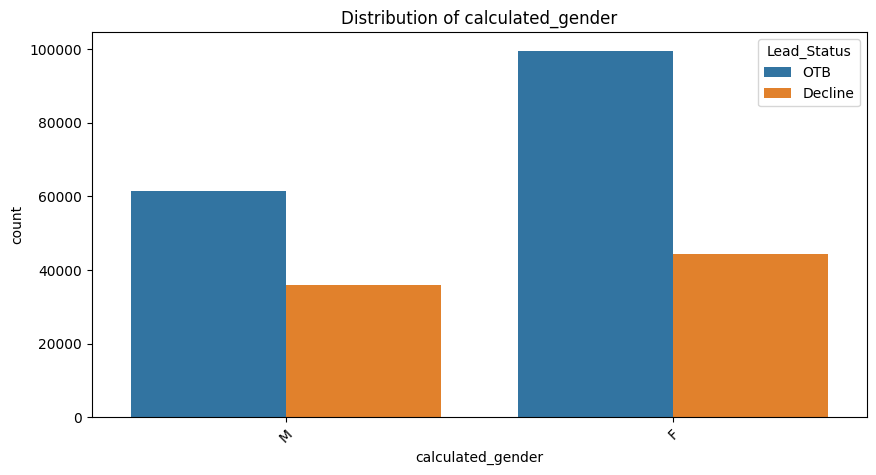

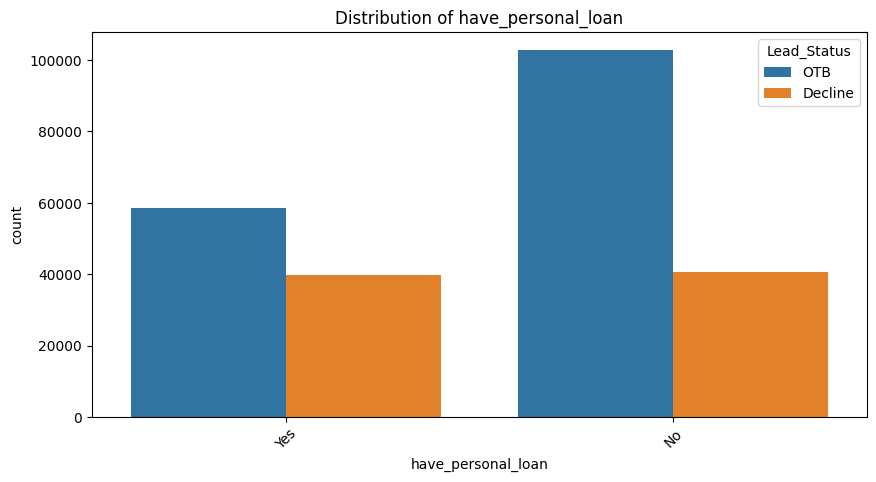

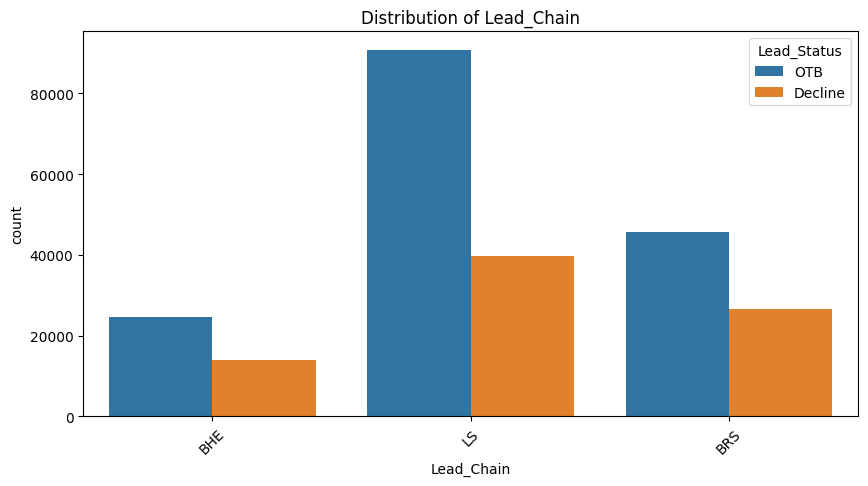

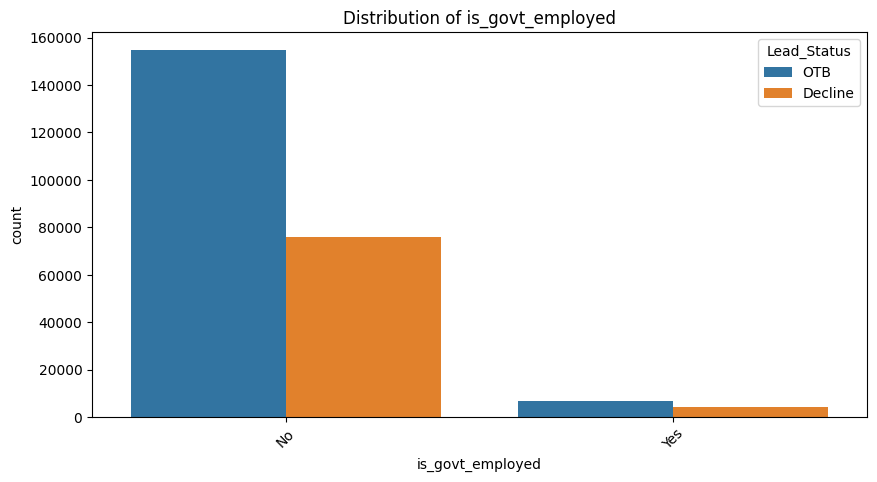

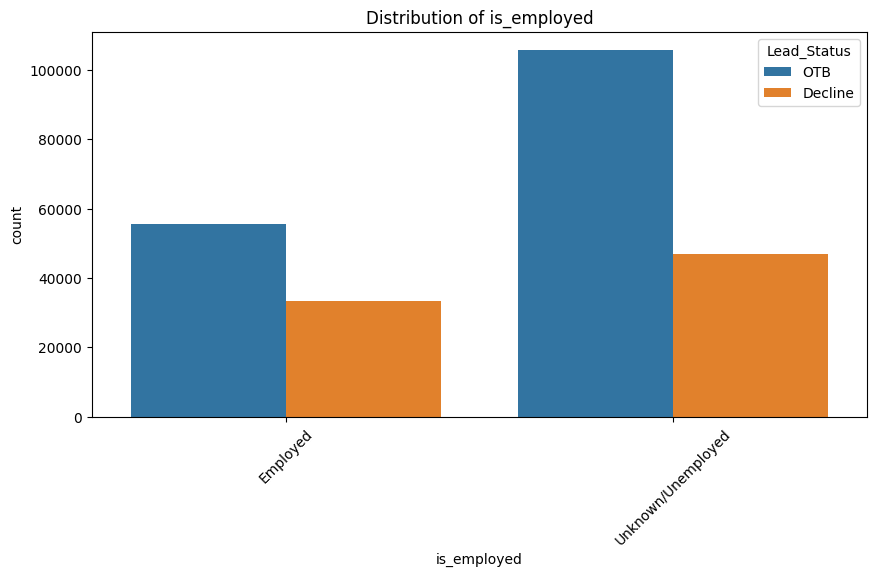

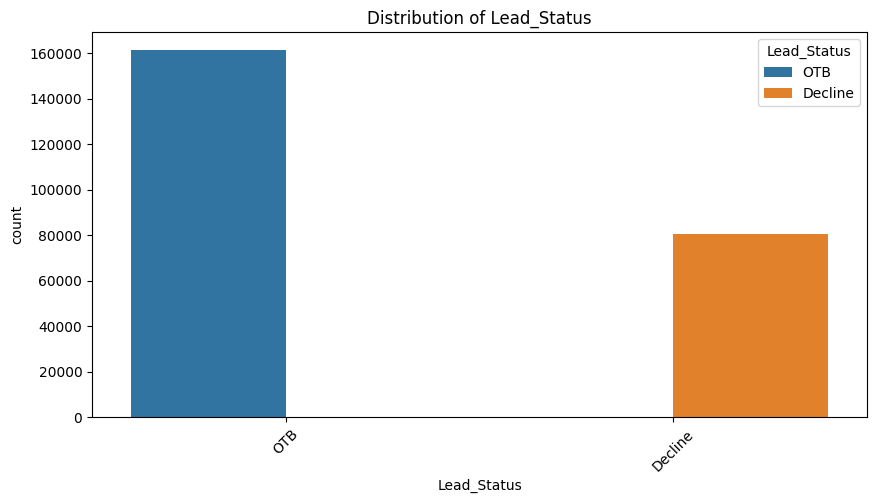

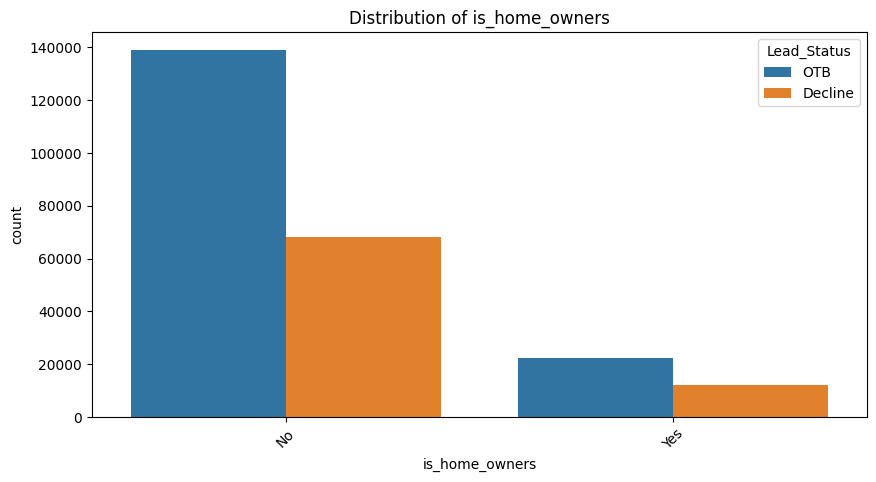

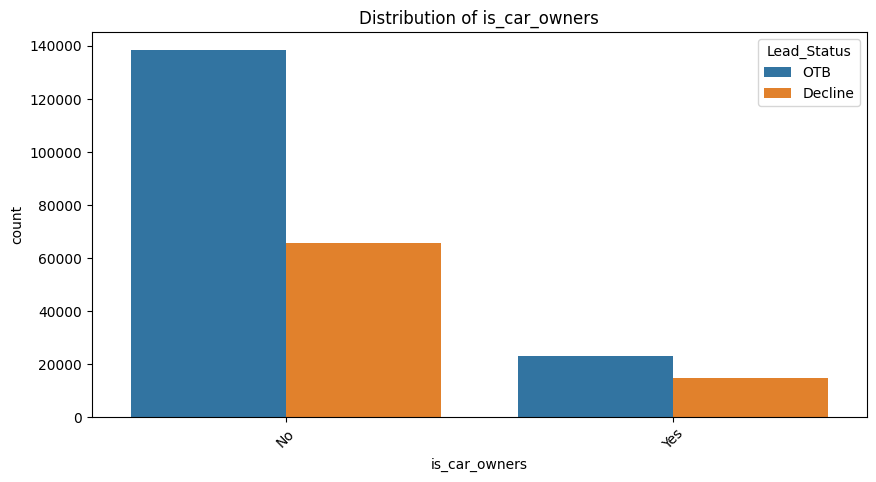

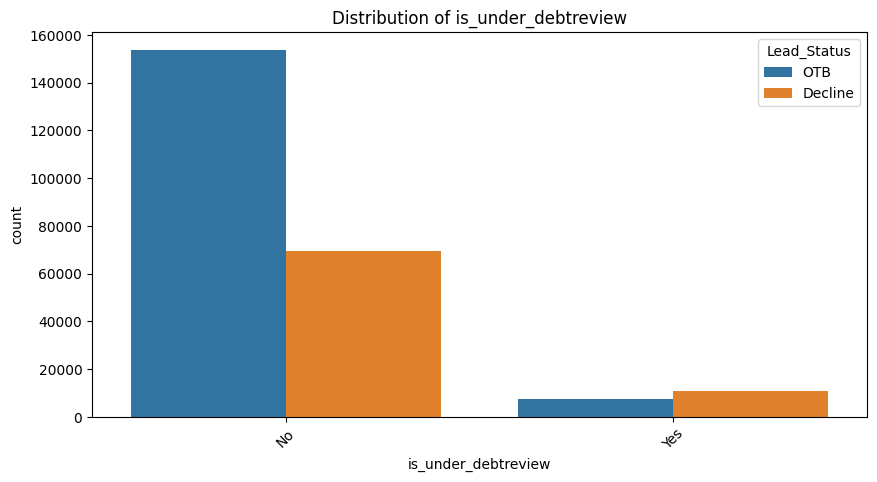

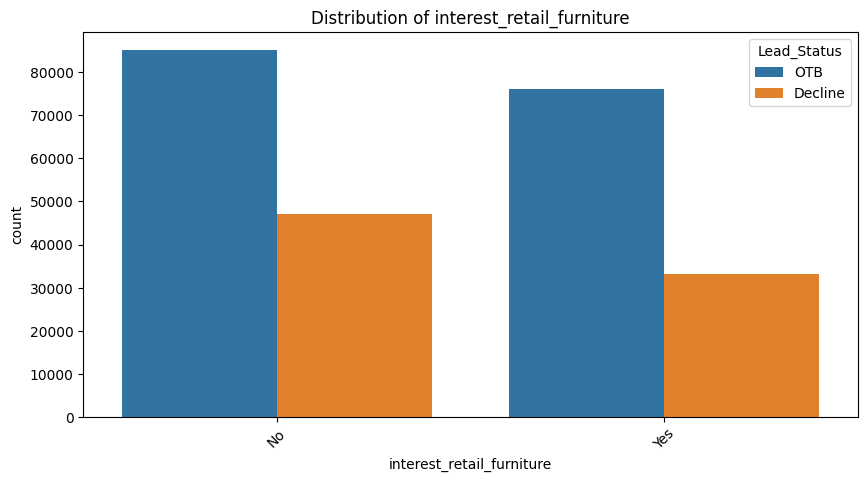

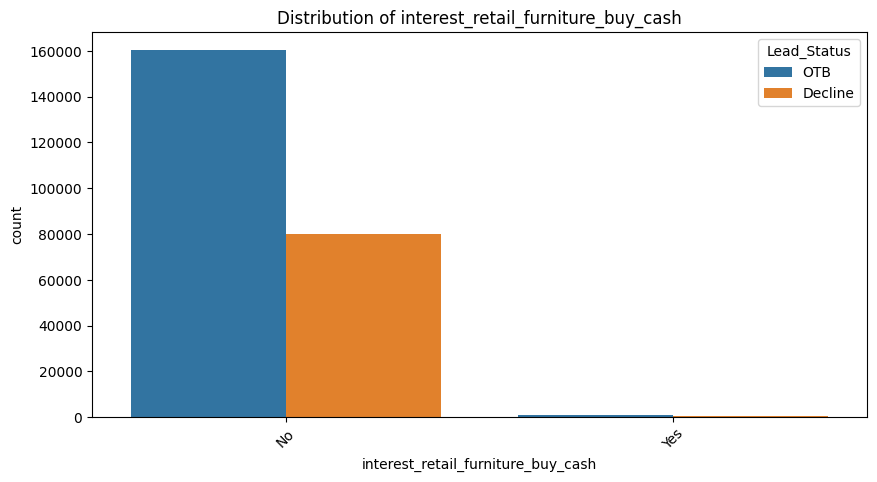

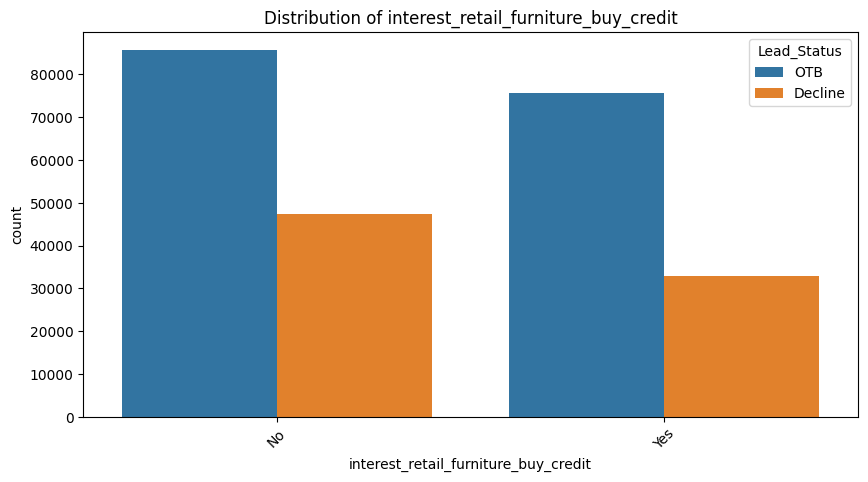

In [82]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)
for col in categorical_cols:
    print(f"\nValue counts of column {col}:")
    print((data[col].value_counts(normalize=True) * 100).round(2))  # Round to two decimal places
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=data, hue='Lead_Status')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

Categorical columns: Index(['calculated_gender', 'have_personal_loan', 'Lead_Chain',
       'is_govt_employed', 'is_employed', 'Lead_Status', 'is_home_owners',
       'is_car_owners', 'is_under_debtreview', 'interest_retail_furniture',
       'interest_retail_furniture_buy_cash',
       'interest_retail_furniture_buy_credit'],
      dtype='object')

Value counts of column calculated_gender:
calculated_gender
F    59.64
M    40.36
Name: proportion, dtype: float64

Value counts of column have_personal_loan:
have_personal_loan
No     59.28
Yes    40.72
Name: proportion, dtype: float64

Value counts of column Lead_Chain:
Lead_Chain
LS     54.03
BRS    30.01
BHE    15.96
Name: proportion, dtype: float64

Value counts of column is_govt_employed:
is_govt_employed
No     95.48
Yes     4.52
Name: proportion, dtype: float64

Value counts of column is_employed:
is_employed
Unknown/Unemployed    63.22
Employed              36.78
Name: proportion, dtype: float64

Value counts of column Lead_Status:

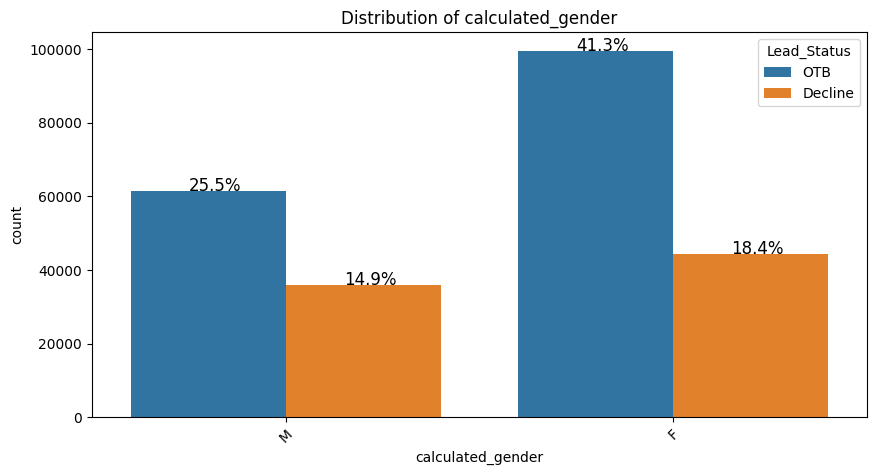


Percentage distribution within each calculated_gender:
Lead_Status        Decline    OTB
calculated_gender                
F                    30.83  69.17
M                    36.81  63.19


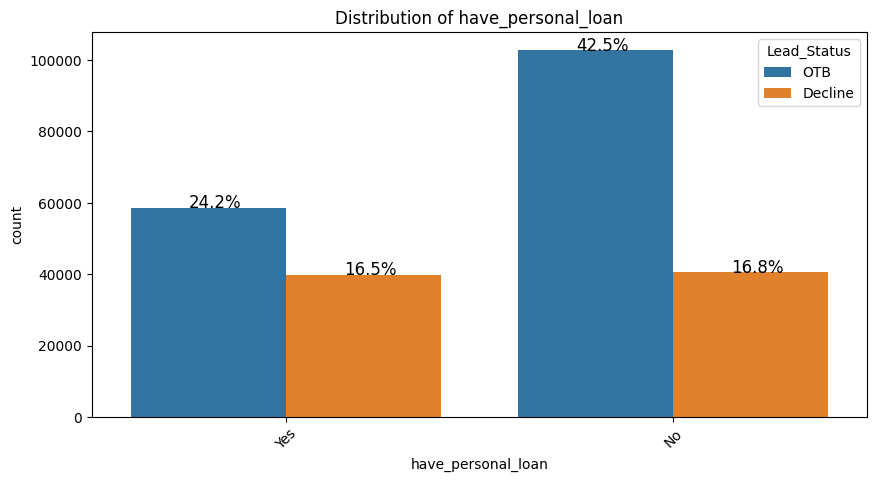


Percentage distribution within each have_personal_loan:
Lead_Status         Decline    OTB
have_personal_loan                
No                    28.28  71.72
Yes                   40.47  59.53


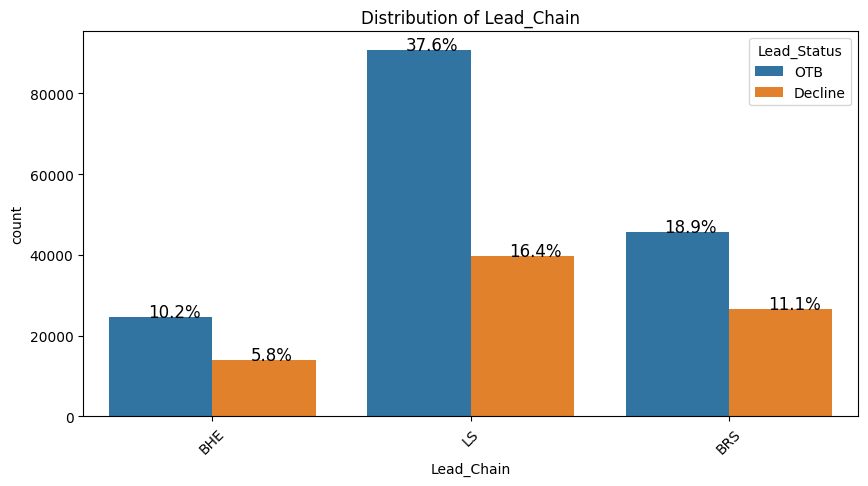


Percentage distribution within each Lead_Chain:
Lead_Status  Decline    OTB
Lead_Chain                 
BHE            36.13  63.87
BRS            36.86  63.14
LS             30.38  69.62


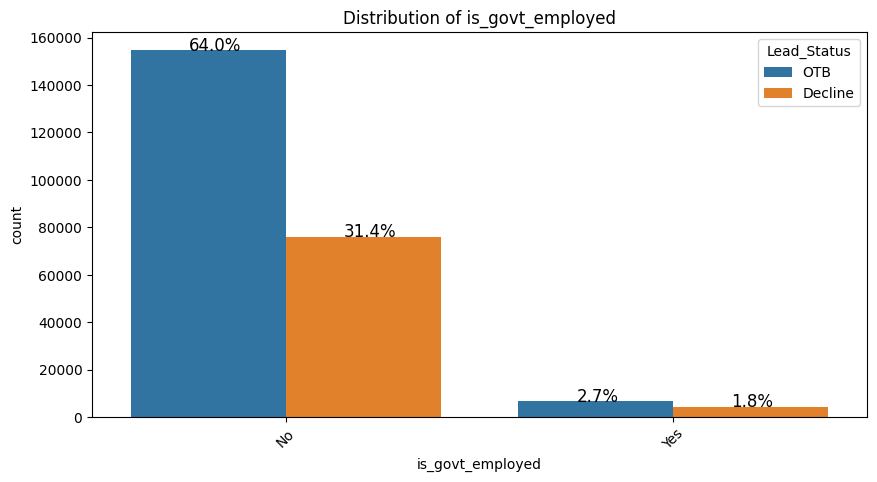


Percentage distribution within each is_govt_employed:
Lead_Status       Decline    OTB
is_govt_employed                
No                  32.93  67.07
Yes                 39.80  60.20


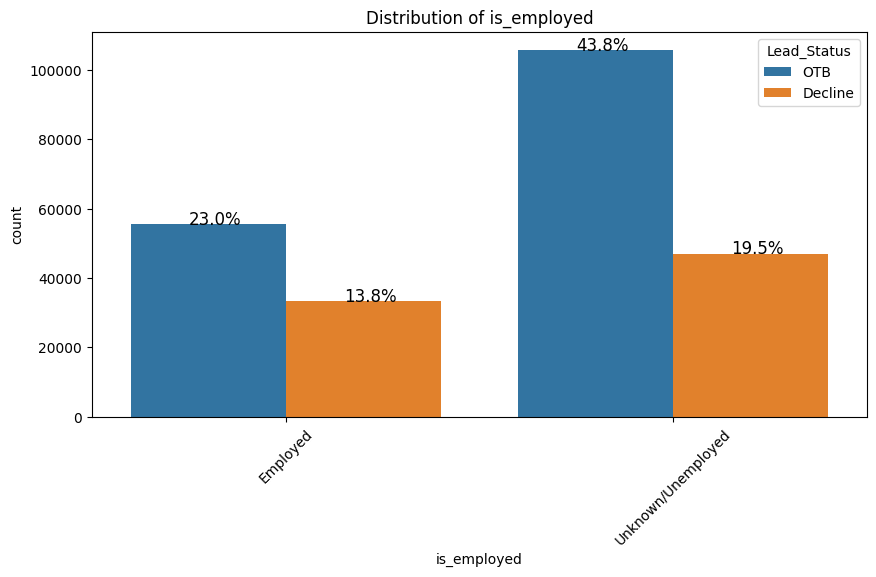


Percentage distribution within each is_employed:
Lead_Status         Decline    OTB
is_employed                       
Employed              37.46  62.54
Unknown/Unemployed    30.79  69.21


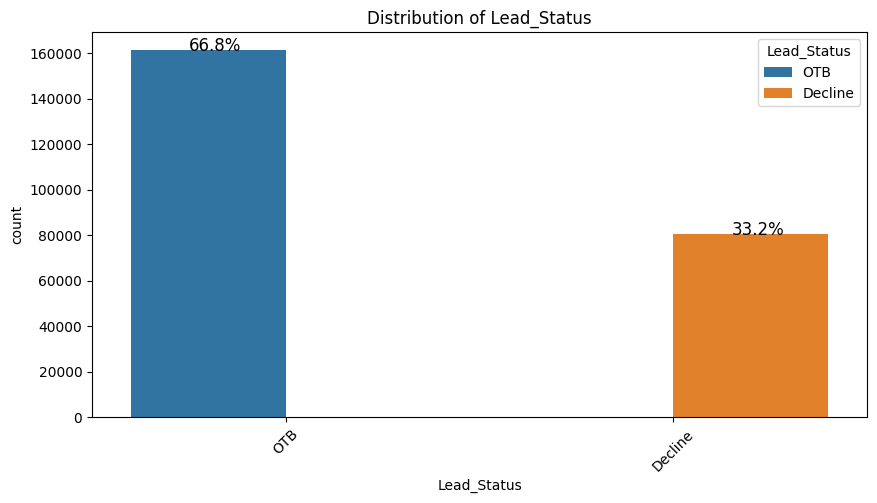


Percentage distribution within each Lead_Status:
Lead_Status  Decline    OTB
Lead_Status                
Decline        100.0    0.0
OTB              0.0  100.0


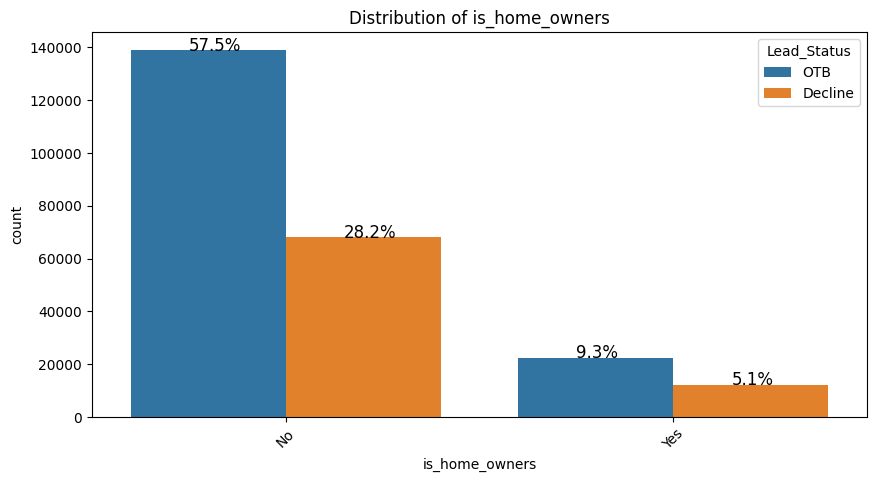


Percentage distribution within each is_home_owners:
Lead_Status     Decline    OTB
is_home_owners                
No                32.89  67.11
Yes               35.36  64.64


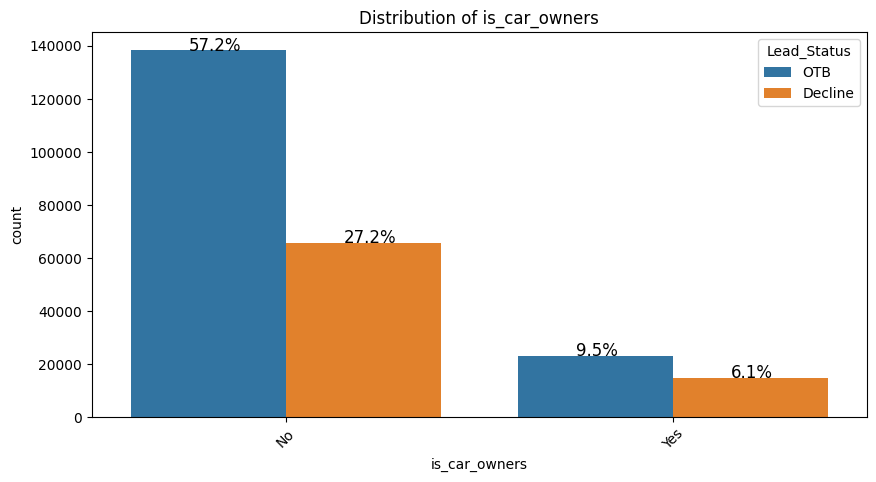


Percentage distribution within each is_car_owners:
Lead_Status    Decline    OTB
is_car_owners                
No               32.17  67.83
Yes              39.03  60.97


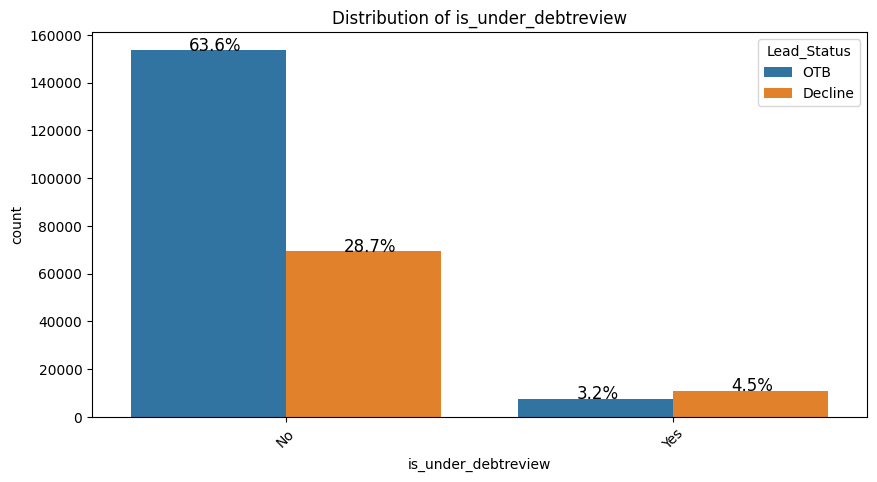


Percentage distribution within each is_under_debtreview:
Lead_Status          Decline    OTB
is_under_debtreview                
No                     31.13  68.87
Yes                    58.55  41.45


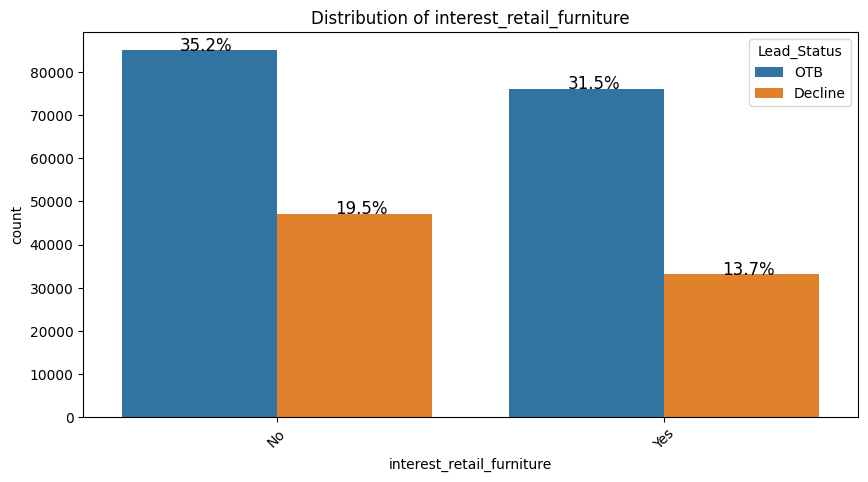


Percentage distribution within each interest_retail_furniture:
Lead_Status                Decline    OTB
interest_retail_furniture                
No                           35.67  64.33
Yes                          30.30  69.70


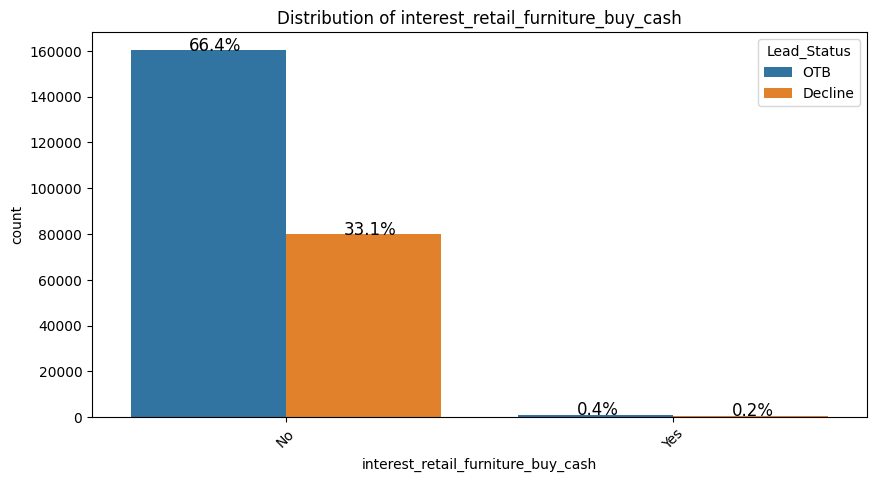


Percentage distribution within each interest_retail_furniture_buy_cash:
Lead_Status                         Decline    OTB
interest_retail_furniture_buy_cash                
No                                    33.26  66.74
Yes                                   29.48  70.52


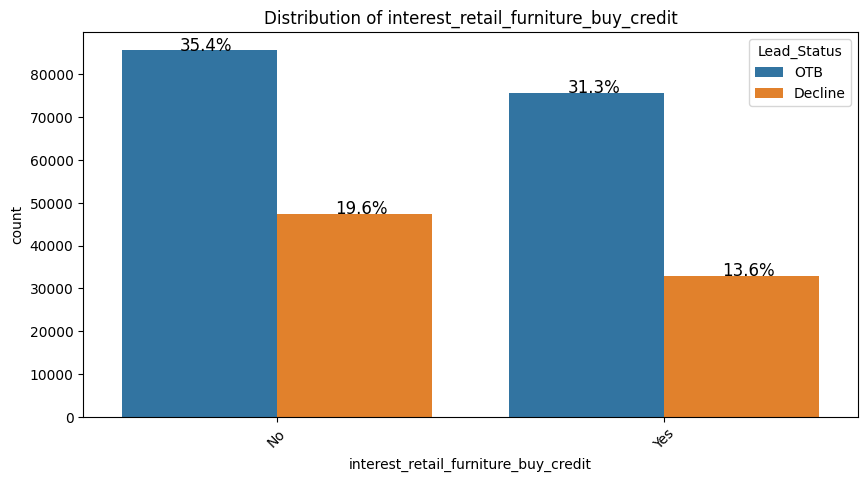


Percentage distribution within each interest_retail_furniture_buy_credit:
Lead_Status                           Decline    OTB
interest_retail_furniture_buy_credit                
No                                      35.63  64.37
Yes                                     30.32  69.68


In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Lead_Status' is your hue column

# Select categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)

# Print value counts and their percentages for each categorical column
for col in categorical_cols:
    print(f"\nValue counts of column {col}:")
    print((data[col].value_counts(normalize=True) * 100).round(2))  # Round to two decimal places

# Plot distribution and compute percentages for each hue
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=col, data=data, hue='Lead_Status')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    
    # Annotate bars with percentages
    total_counts = len(data)
    for p in ax.patches:
        height = p.get_height()
        if height == 0:
            continue
        percentage = '{:.1f}%'.format(100 * height / total_counts)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = height
        ax.annotate(percentage, (x, y), size=12)
    
    plt.show()
    
    # Calculate the percentage for each hue
    crosstab = pd.crosstab(data[col], data['Lead_Status'], normalize='index') * 100
    print(f"\nPercentage distribution within each {col}:")
    print(crosstab.round(2))


In [84]:
total_blank_values = data.isnull().sum().sum()

print("Total blank values in the DataFrame:", total_blank_values)

Total blank values in the DataFrame: 0


In [85]:
data=data.dropna()

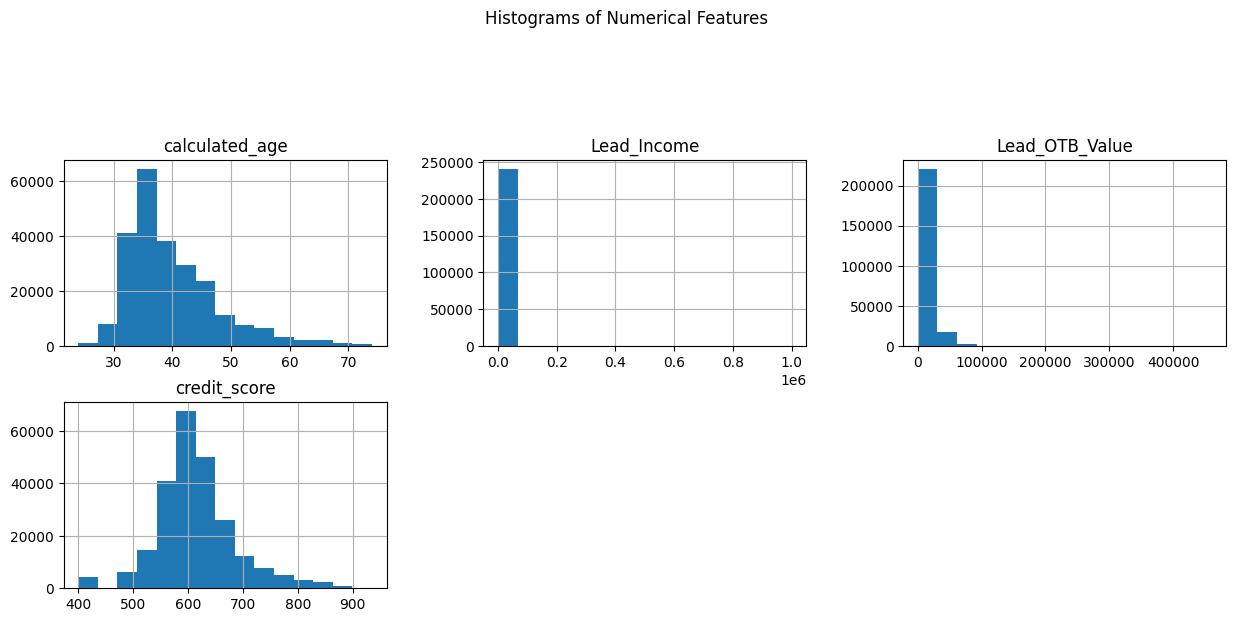

In [86]:
data.hist(bins=15, figsize=(15, 15), layout=(5, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()


In [87]:
data.describe()

,calculated_age,Lead_Income,Lead_OTB_Value,credit_score
count,241467.0,241467.000000,241467.000000,241467.0
mean,39.749846,8139.904847,10111.419159,615.236745
std,7.791146,15309.391357,14240.205604,72.821339
min,24.0,0.000000,0.000000,400.0
25%,34.0,2500.000000,0.000000,575.0
50%,38.0,6000.000000,6000.000000,607.0
75%,43.0,10800.000000,13300.000000,647.0
max,74.0,999999.000000,460000.000000,935.0


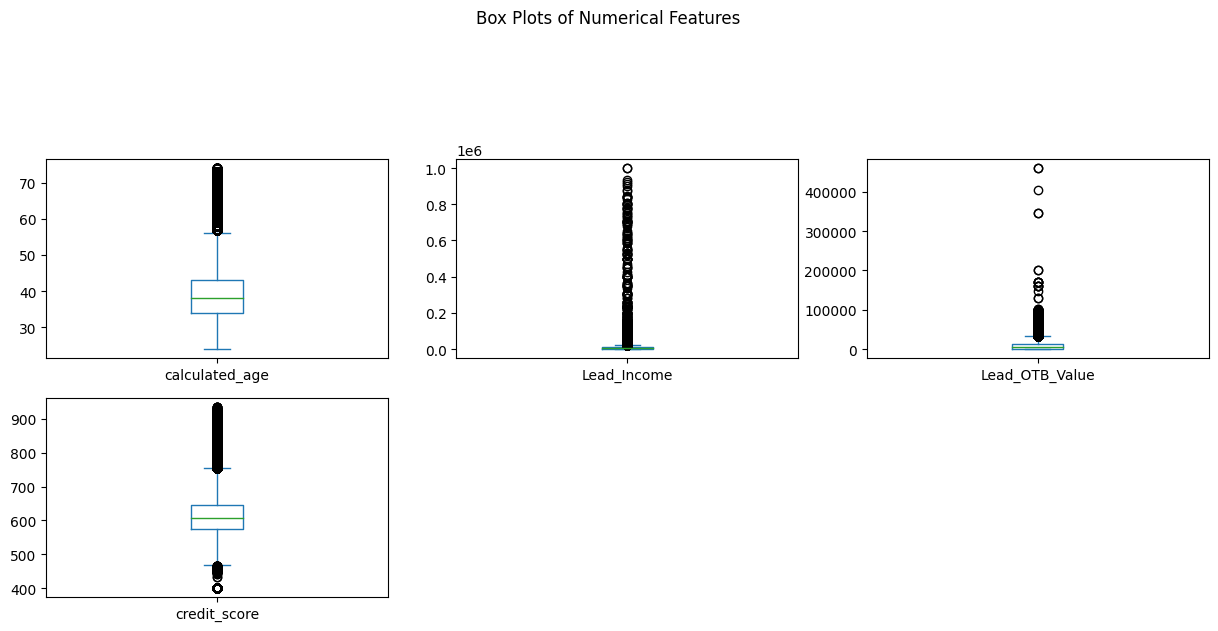

In [88]:
data.plot(kind='box', subplots=True, layout=(5,3), figsize=(15, 15))
plt.suptitle('Box Plots of Numerical Features')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x30ccbfd10>,
 'caps': [<matplotlib.lines.Line2D at 0x30cc68d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x30cc66350>],
 'medians': [<matplotlib.lines.Line2D at 0x30cc69e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x30cc6a750>],
 'means': []}

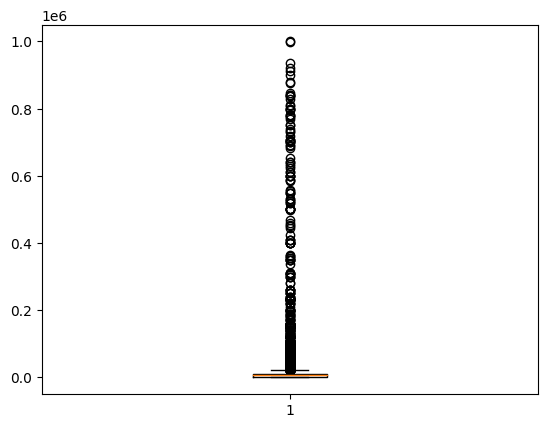

In [89]:
plt.boxplot(data['Lead_Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x173747e50>,
 'caps': [<matplotlib.lines.Line2D at 0x30fa7d150>,
 'boxes': [<matplotlib.lines.Line2D at 0x173747450>],
 'medians': [<matplotlib.lines.Line2D at 0x30fa7e050>],
 'fliers': [<matplotlib.lines.Line2D at 0x30cd241d0>],
 'means': []}

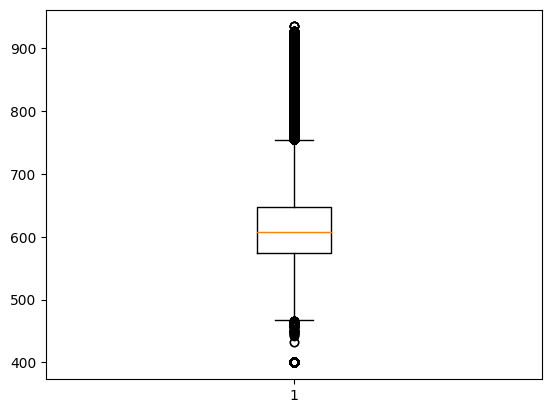

In [90]:
plt.boxplot(data['credit_score'])

In [91]:
data['credit_score'].isna().sum()


0

In [92]:
print(data['credit_score'].dtype)


Int64


In [93]:
data['credit_score'] = data['credit_score'].astype(float)

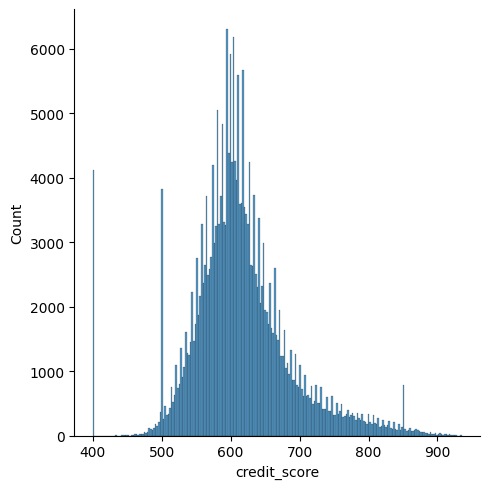

In [94]:
sns.displot(data=data, x="credit_score")
plt.show()

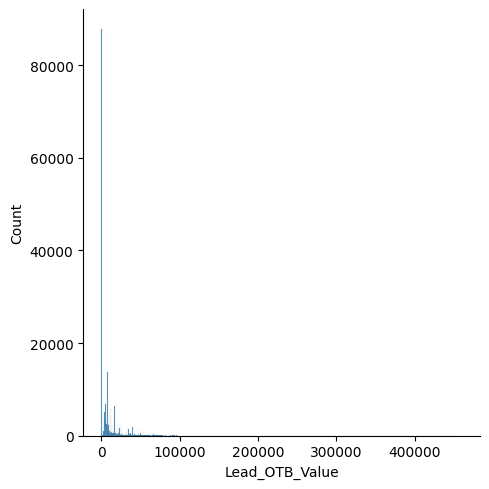

In [95]:
sns.displot(data=data, x="Lead_OTB_Value")
plt.show()